In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
%matplotlib inline
sns.set_style('white')

### 3.3.3 Ridge and LASSO Regression - Regularization Selection

Objective:  Using the sample data (X_train2), create plots to show how R-squared and mean square error varies with lambda selection in Ridge and LASSO Regression models.

In [10]:
# This code block: 
# Load data from lesson.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic relationships
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

### Ridge Regression

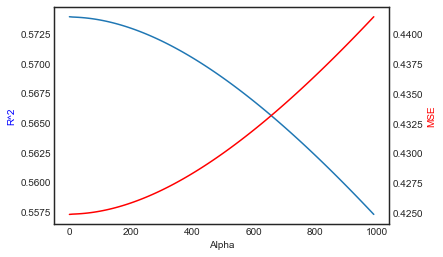

In [96]:
# Instantiate model
ridge = linear_model.Ridge()

# Create holders for coefficients 
ridge_r_squared = []
ridge_errors = []

# Generate range of alpha values
alphas = np.arange(1, 1000, 10)

# Train model with different regularization values
for a in alphas:
    ridge.set_params(alpha=a, fit_intercept=False)
    ridge.fit(X_train2, Y_train)
    y_pred = ridge.predict(X_train2)
    ridge_r_squared.append(ridge.score(X_train2, Y_train))
    ridge_errors.append(mean_squared_error(y_pred, Y_train))

# Display results
plt.figure(figsize=(15,8))

fig, ax1 = plt.subplots()

ax1.plot(alphas, ridge_r_squared)
ax1.set_xlabel('Alpha')
ax1.set_ylabel('R^2', color='b')

ax2 = ax1.twinx()
ax2.plot(alphas, ridge_errors, color='r')
ax2.set_ylabel('MSE', color='r')

plt.show()

### LASSO Regression

c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


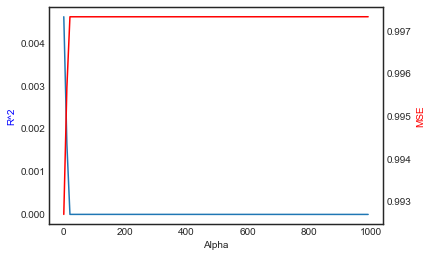

In [85]:
# Instantiate model
lasso = linear_model.Lasso()

# Create holders for coefficients 
lasso_r_squared = []
lasso_errors = []

# Generate range of alpha values
alphas = np.arange(1, 1000, 10)

# Train model with different regularization values
for a in alphas:
    lasso.set_params(alpha=a, fit_intercept=False)
    lasso.fit(X_train2, Y_train)
    y_pred = lasso.predict(X_train2)
    lasso_r_squared.append(lasso.score(X_train2, Y_train))
    lasso_errors.append(mean_squared_error(y_pred, Y_train))

# Display results
plt.figure(figsize=(15,8))

fig, ax1 = plt.subplots()

ax1.plot(alphas, lasso_r_squared)
ax1.set_xlabel('Alpha')
ax1.set_ylabel('R^2', color='b')

ax2 = ax1.twinx()
ax2.plot(alphas, lasso_errors, color='r')
ax2.set_ylabel('MSE', color='r')

plt.show()

**I think something went wrong with the LASSO regression.  R^2 values seem very off. Also address pink error box. Troubleshoot during mentor session.**

### R-squared Comparison

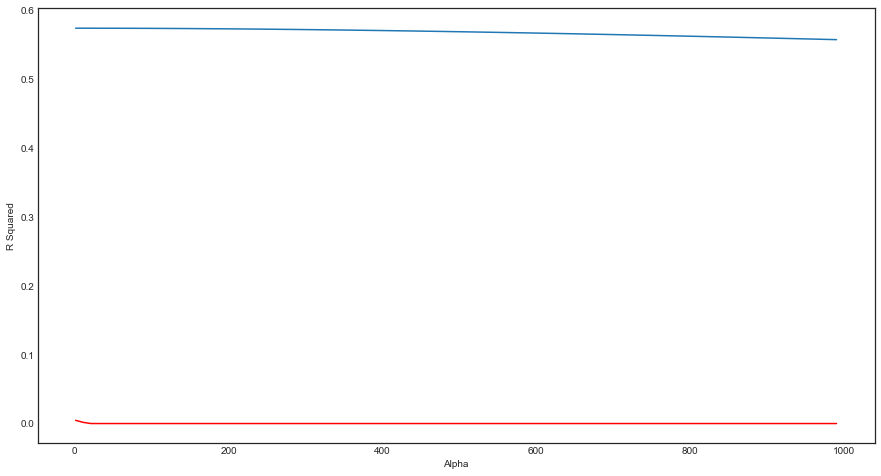

In [107]:
# update this section when LASSO regression is fixed

plt.figure(figsize=(15,8))

plt.plot(alphas, ridge_r_squared)
plt.plot(alphas, lasso_r_squared, color='r')
plt.ylabel('R Squared')
plt.xlabel('Alpha')

plt.show()